# Bangalore house price prediction

The steps to be followed in MLprocess
**problem statement**
1.collect dataset
2.import libraries
3.Loading /importing/reading dataset into our program
4.data preprocessing
5.select the model
6.fit our data to model
8.deploy the model

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

**supervised Regression problem**
we need to predict house price in bangloure area

In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv') #uploading dataset

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
# Exploratory data analysis 

In [5]:
df.shape

(13320, 9)

**This is an important step since we may have to remove certain data(rows and columns)due to many NaN(absent)values thus to have an overlook at the size of data in the beginning is a smart step to take**

In [6]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [7]:
df.isnull().sum() #finding null values in dataset

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [8]:
df['society'].value_counts()

GrrvaGr    80
PrarePa    76
Sryalan    59
Prtates    59
GMown E    56
           ..
Amionce     1
JaghtDe     1
Jauraht     1
Brity U     1
RSntsAp     1
Name: society, Length: 2688, dtype: int64

In [9]:
df2 = df.drop(['availability','society'],axis = 1) 
#availibility and society is not much important factor so we will drop them

In [10]:
df2.isnull().sum()

area_type       0
location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

**As balcony has 609 missing data so we will fill these data by taking
the median value of all the available balcaony data**

In [11]:
df2.balcony=df2.balcony.fillna(df2.balcony.median()) #skewed positively so we used median else we use mode for categorical variable

In [12]:
df2.isnull().sum()

area_type      0
location       1
size          16
total_sqft     0
bath          73
balcony        0
price          0
dtype: int64

**As bath dataset has 73 missing data so we will fill these data by taking the median value of all the available bath data**

In [13]:
df2.bath=df2.bath.fillna(df2.bath.median())

In [14]:
df2.isnull().sum()

area_type      0
location       1
size          16
total_sqft     0
bath           0
balcony        0
price          0
dtype: int64

In [15]:
df3=df2.dropna() 
#drop the rows where atleast one element is missing

In [16]:
df3.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [17]:
df3.shape

(13303, 7)

In [18]:
df3['size'].unique() 
#To find the unique value of array

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [19]:
df3['BHK']=df3['size'].apply(lambda x: int(x.split(" ")[0]))
#The output here is trying to tell us to use .loc instead of our code.
#We use lambda function here(use google for this)

C:\Users\Shiv Yadav\AppData\Local\Temp\ipykernel_22228\2227801779.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['BHK']=df3['size'].apply(lambda x: int(x.split(" ")[0]))


In [20]:
df3.head()

,area_type,location,size,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [21]:
df3.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
BHK           0
dtype: int64

**location**
*In this column we have high uniue values(1304) and it is impossiblr to know every value and use it for prediction.Thus we check which area(Location) has maximum repeatation in our data.
Any location with repeatation less than 10 can be replaced as "other"
**After doing that we have only 242 unique values in location*

In [22]:
df3['location'].unique()  #to check the unique vlue

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [23]:
df3.groupby(['location']).count() #

,area_type,size,total_sqft,bath,balcony,price,BHK
location,,,,,,,
Anekal,1,1,1,1,1,1,1
Banaswadi,1,1,1,1,1,1,1
Basavangudi,1,1,1,1,1,1,1
Bhoganhalli,1,1,1,1,1,1,1
Devarabeesana Halli,6,6,6,6,6,6,6
...,...,...,...,...,...,...,...
t.c palya,1,1,1,1,1,1,1
tc.palya,4,4,4,4,4,4,4
vinayakanagar,1,1,1,1,1,1,1


In [24]:
df3=df3.drop(['size'],axis=1) 
#we have dropped size because we have extracted Size into BHK column


<AxesSubplot:xlabel='BHK'>

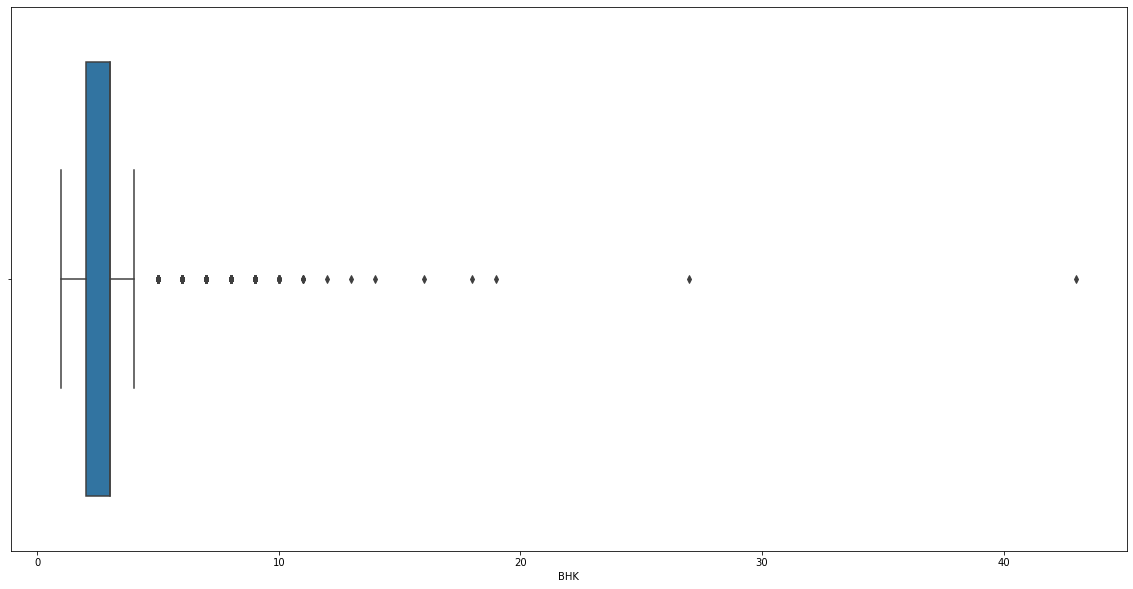

In [25]:
import seaborn as sns 
sns.boxplot(x=df3['BHK'],data=df3)

In [26]:
df3.head()

,area_type,location,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,1440,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,1200,2.0,1.0,51.00,2


In [27]:
df3.groupby(['total_sqft']).count()

,area_type,location,bath,balcony,price,BHK
total_sqft,,,,,,
1,1,1,1,1,1,1
1.25Acres,1,1,1,1,1,1
1.26Acres,1,1,1,1,1,1
1000,172,172,172,172,172,172
1000 - 1285,1,1,1,1,1,1
...,...,...,...,...,...,...
995,10,10,10,10,10,10
996,4,4,4,4,4,4
997,2,2,2,2,2,2


In [28]:
df3.shape

(13303, 7)

**Major problem in total_sqft because it has data in different units andrange : eg. 1000-1285, 1.25 Acres**

In [29]:
# we would drop rows with SQ meter and perch
#FOR DATA IN RANGE WE WOULD REPLACE IT WITH AVERAGE.
#USING THIS FUNCTION WE ARE CREATING A CLEANER VERSION OF total_sqft
def convert_float(X):
    
    
    tokens = X.split('-')
    if len(tokens)==2: 
        return (float(tokens[1])+float(tokens[0]))/2
    try:
        return float(X)
    except: 
        return None
   

In [30]:
#creating copy and continuing
df4=df3.copy()

In [31]:
df4.groupby(['total_sqft'])

In [32]:
df4['total_sqft1']=df4['total_sqft'].apply(convert_float)

In [33]:
df4.loc[410]

area_type      Super built-up  Area
location                    Kengeri
total_sqft           34.46Sq. Meter
bath                            1.0
balcony                         0.0
price                          18.5
BHK                               1
total_sqft1                     NaN
Name: 410, dtype: object

In [34]:
df4.loc[30]

area_type      Super built-up  Area
location                  Yelahanka
total_sqft              2100 - 2850
bath                            4.0
balcony                         0.0
price                         186.0
BHK                               4
total_sqft1                  2475.0
Name: 30, dtype: object

In [35]:
df4.isnull().sum()

area_type       0
location        0
total_sqft      0
bath            0
balcony         0
price           0
BHK             0
total_sqft1    46
dtype: int64

In [36]:
df4.dropna(inplace=True) #rows dropped

In [37]:
df4.isnull().sum()

area_type      0
location       0
total_sqft     0
bath           0
balcony        0
price          0
BHK            0
total_sqft1    0
dtype: int64

In [38]:
df.shape

(13320, 9)

In [39]:
df4.drop(['total_sqft'],axis=1)

,area_type,location,bath,balcony,price,BHK,total_sqft1
0,Super built-up Area,Electronic City Phase II,2.0,1.0,39.07,2,1056.0
1,Plot Area,Chikka Tirupathi,5.0,3.0,120.00,4,2600.0
2,Built-up Area,Uttarahalli,2.0,3.0,62.00,3,1440.0
3,Super built-up Area,Lingadheeranahalli,3.0,1.0,95.00,3,1521.0
4,Super built-up Area,Kothanur,2.0,1.0,51.00,2,1200.0
...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,4.0,0.0,231.00,5,3453.0
13316,Super built-up Area,Richards Town,5.0,2.0,400.00,4,3600.0
13317,Built-up Area,Raja Rajeshwari Nagar,2.0,1.0,60.00,2,1141.0
13318,Super built-up Area,Padmanabhanagar,4.0,1.0,488.00,4,4689.0


**Creating price_per_sqft Later this would help us to remove the
outlier (we say two in outliers in bhk(24,42))**
(#price in lakhs)

In [40]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft1']
df5.head()

,area_type,location,total_sqft,bath,balcony,price,BHK,total_sqft1,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056,2.0,1.0,39.07,2,1056.0,3699.810606
1,Plot Area,Chikka Tirupathi,2600,5.0,3.0,120.00,4,2600.0,4615.384615
2,Built-up Area,Uttarahalli,1440,2.0,3.0,62.00,3,1440.0,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521,3.0,1.0,95.00,3,1521.0,6245.890861
4,Super built-up Area,Kothanur,1200,2.0,1.0,51.00,2,1200.0,4250.000000


In [41]:
len(df5.location.unique())

1298

In [42]:
#Stripping any whitespaces

In [43]:
df5.location=df5.location.apply(lambda x : x.strip())

In [44]:
location_stats=df5['location'].value_counts()
location_stats

Whitefield                   538
Sarjapur  Road               397
Electronic City              304
Kanakpura Road               271
Thanisandra                  236
                            ... 
Nagarbhavi  BDA Complex        1
Rajanna Layout                 1
1 Ramamurthy Nagar             1
Lakshmipura Vidyaanyapura      1
Abshot Layout                  1
Name: location, Length: 1287, dtype: int64

In [45]:
location_stats1 = df5.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats1

location
Whitefield               538
Sarjapur  Road           397
Electronic City          304
Kanakpura Road           271
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [46]:
location_stats_below_ten = location_stats[location_stats<=10]
# THEREFORE WE SEE THAT OUT OF 1298 ROWS
#ALMOST 1047 ROWS HAVE LESS THAN 10 REPETATION SO RATHER THAN LOSING THIS DATA 
#WE PLACE THEM UNDER "OTHER"

In [47]:
len(location_stats_below_ten)

1047

In [48]:
""" using lambda func we place these 1047 in a location 'others'"""
df5.location = df5.location.apply(lambda x: "other" if x in location_stats_below_ten else x)
len(df5.location.unique())

241

In [49]:
df5.groupby('location').agg('count')

,area_type,total_sqft,bath,balcony,price,BHK,total_sqft1,price_per_sqft
location,,,,,,,,
1st Block Jayanagar,14,14,14,14,14,14,14,14
1st Phase JP Nagar,24,24,24,24,24,24,24,24
2nd Phase Judicial Layout,11,11,11,11,11,11,11,11
2nd Stage Nagarbhavi,24,24,24,24,24,24,24,24
5th Block Hbr Layout,12,12,12,12,12,12,12,12
...,...,...,...,...,...,...,...,...
Yelahanka,212,212,212,212,212,212,212,212
Yelahanka New Town,40,40,40,40,40,40,40,40
Yelenahalli,13,13,13,13,13,13,13,13


In [50]:
df5.head(15)

,area_type,location,total_sqft,bath,balcony,price,BHK,total_sqft1,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056,2.0,1.0,39.07,2,1056.0,3699.810606
1,Plot Area,Chikka Tirupathi,2600,5.0,3.0,120.00,4,2600.0,4615.384615
2,Built-up Area,Uttarahalli,1440,2.0,3.0,62.00,3,1440.0,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521,3.0,1.0,95.00,3,1521.0,6245.890861
4,Super built-up Area,Kothanur,1200,2.0,1.0,51.00,2,1200.0,4250.000000
5,Super built-up Area,Whitefield,1170,2.0,1.0,38.00,2,1170.0,3247.863248
6,Super built-up Area,Old Airport Road,2732,4.0,2.0,204.00,4,2732.0,7467.057101
7,Super built-up Area,Rajaji Nagar,3300,4.0,2.0,600.00,4,3300.0,18181.818182
8,Super built-up Area,Marathahalli,1310,3.0,1.0,63.25,3,1310.0,4828.244275
9,Plot Area,other,1020,6.0,2.0,370.00,6,1020.0,36274.509804


In [51]:
df5.groupby('location').get_group("Electronic City Phase II")

,area_type,location,total_sqft,bath,balcony,price,BHK,total_sqft1,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056,2.0,1.0,39.07,2,1056.0,3699.810606
155,Super built-up Area,Electronic City Phase II,1020,2.0,1.0,30.60,2,1020.0,3000.000000
292,Super built-up Area,Electronic City Phase II,1069,2.0,2.0,45.00,2,1069.0,4209.541628
354,Super built-up Area,Electronic City Phase II,630,1.0,1.0,28.35,1,630.0,4500.000000
461,Super built-up Area,Electronic City Phase II,1220,2.0,1.0,35.23,3,1220.0,2887.704918
...,...,...,...,...,...,...,...,...,...
12910,Built-up Area,Electronic City Phase II,1200,2.0,1.0,34.65,2,1200.0,2887.500000
12974,Super built-up Area,Electronic City Phase II,1031,2.0,1.0,54.48,2,1031.0,5284.190107
12988,Built-up Area,Electronic City Phase II,545,1.0,1.0,28.00,2,545.0,5137.614679
13055,Super built-up Area,Electronic City Phase II,1310,2.0,1.0,37.83,3,1310.0,2887.786260


In [52]:
df5

,area_type,location,total_sqft,bath,balcony,price,BHK,total_sqft1,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056,2.0,1.0,39.07,2,1056.0,3699.810606
1,Plot Area,Chikka Tirupathi,2600,5.0,3.0,120.00,4,2600.0,4615.384615
2,Built-up Area,Uttarahalli,1440,2.0,3.0,62.00,3,1440.0,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521,3.0,1.0,95.00,3,1521.0,6245.890861
4,Super built-up Area,Kothanur,1200,2.0,1.0,51.00,2,1200.0,4250.000000
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,3453,4.0,0.0,231.00,5,3453.0,6689.834926
13316,Super built-up Area,other,3600,5.0,2.0,400.00,4,3600.0,11111.111111
13317,Built-up Area,Raja Rajeshwari Nagar,1141,2.0,1.0,60.00,2,1141.0,5258.545136
13318,Super built-up Area,Padmanabhanagar,4689,4.0,1.0,488.00,4,4689.0,10407.336319


In [53]:
df5=df5.drop(['total_sqft'],axis=1)

In [54]:
df5

,area_type,location,bath,balcony,price,BHK,total_sqft1,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2.0,1.0,39.07,2,1056.0,3699.810606
1,Plot Area,Chikka Tirupathi,5.0,3.0,120.00,4,2600.0,4615.384615
2,Built-up Area,Uttarahalli,2.0,3.0,62.00,3,1440.0,4305.555556
3,Super built-up Area,Lingadheeranahalli,3.0,1.0,95.00,3,1521.0,6245.890861
4,Super built-up Area,Kothanur,2.0,1.0,51.00,2,1200.0,4250.000000
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,4.0,0.0,231.00,5,3453.0,6689.834926
13316,Super built-up Area,other,5.0,2.0,400.00,4,3600.0,11111.111111
13317,Built-up Area,Raja Rajeshwari Nagar,2.0,1.0,60.00,2,1141.0,5258.545136
13318,Super built-up Area,Padmanabhanagar,4.0,1.0,488.00,4,4689.0,10407.336319


In [55]:
df5[df5.total_sqft1/df5.BHK<300]

,area_type,location,bath,balcony,price,BHK,total_sqft1,price_per_sqft
9,Plot Area,other,6.0,2.0,370.0,6,1020.0,36274.509804
45,Plot Area,HSR Layout,9.0,2.0,200.0,8,600.0,33333.333333
58,Plot Area,Murugeshpalya,4.0,1.0,150.0,6,1407.0,10660.980810
68,Plot Area,Devarachikkanahalli,7.0,0.0,85.0,8,1350.0,6296.296296
70,Plot Area,other,3.0,2.0,100.0,3,500.0,20000.000000
...,...,...,...,...,...,...,...,...
13277,Plot Area,other,7.0,2.0,218.0,7,1400.0,15571.428571
13279,Plot Area,other,5.0,2.0,130.0,6,1200.0,10833.333333
13281,Plot Area,Margondanahalli,5.0,1.0,125.0,5,1375.0,9090.909091
13303,Plot Area,Vidyaranyapura,5.0,3.0,70.0,5,774.0,9043.927649


In [56]:
df6 = df5[~(df5.total_sqft1/df5.BHK<300)] #REMOVING OUTLIER
"""IN THIS DATA SET WE HAVE (BHK AND TOTAL_SQFT1)"""
"""WE DIVIDE TOTAL SQFT BY BHK IF THE ANSWER IS LESS THAN 300 WE WILL DROP THAT DATA """

'WE DIVIDE TOTAL SQFT BY BHK IF THE ANSWER IS LESS THAN 300 WE WILL DROP THAT DATA '

In [57]:
df6.shape

(12513, 8)

In [58]:
df6

,area_type,location,bath,balcony,price,BHK,total_sqft1,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2.0,1.0,39.07,2,1056.0,3699.810606
1,Plot Area,Chikka Tirupathi,5.0,3.0,120.00,4,2600.0,4615.384615
2,Built-up Area,Uttarahalli,2.0,3.0,62.00,3,1440.0,4305.555556
3,Super built-up Area,Lingadheeranahalli,3.0,1.0,95.00,3,1521.0,6245.890861
4,Super built-up Area,Kothanur,2.0,1.0,51.00,2,1200.0,4250.000000
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,4.0,0.0,231.00,5,3453.0,6689.834926
13316,Super built-up Area,other,5.0,2.0,400.00,4,3600.0,11111.111111
13317,Built-up Area,Raja Rajeshwari Nagar,2.0,1.0,60.00,2,1141.0,5258.545136
13318,Super built-up Area,Padmanabhanagar,4.0,1.0,488.00,4,4689.0,10407.336319


In [59]:
df6['BHK'].value_counts()

2     5477
3     4749
4     1259
1      642
5      203
6       91
7       42
8       25
9       15
10       6
11       2
16       1
13       1
Name: BHK, dtype: int64

In [60]:
df6.groupby('location').agg('count')

,area_type,bath,balcony,price,BHK,total_sqft1,price_per_sqft
location,,,,,,,
1st Block Jayanagar,10,10,10,10,10,10,10
1st Phase JP Nagar,23,23,23,23,23,23,23
2nd Phase Judicial Layout,11,11,11,11,11,11,11
2nd Stage Nagarbhavi,9,9,9,9,9,9,9
5th Block Hbr Layout,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...
Yelahanka,207,207,207,207,207,207,207
Yelahanka New Town,38,38,38,38,38,38,38
Yelenahalli,13,13,13,13,13,13,13


In [61]:
df6.price_per_sqft.describe()

count     12513.000000
mean       6307.441644
std        4160.931610
min         267.829813
25%        4210.526316
50%        5295.007564
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

**There may be outlier in some locations, like an area with lowprice rate may have a house with low sqft and high price**
therefore we will calculate standard deviation of price_per_sqft w.r.t location

<AxesSubplot:xlabel='Price', ylabel='Count'>

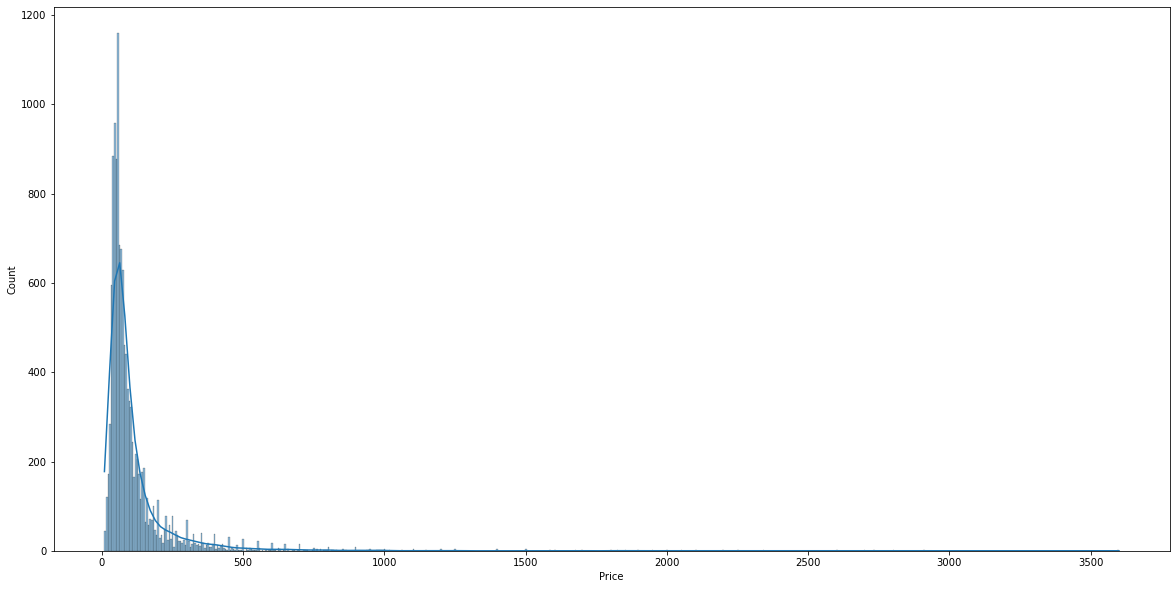

In [62]:
target=pd.Series(df6.price,name="Price")
sns.histplot(data=target,kde=True)

<AxesSubplot:xlabel='Numerical Variable', ylabel='Count'>

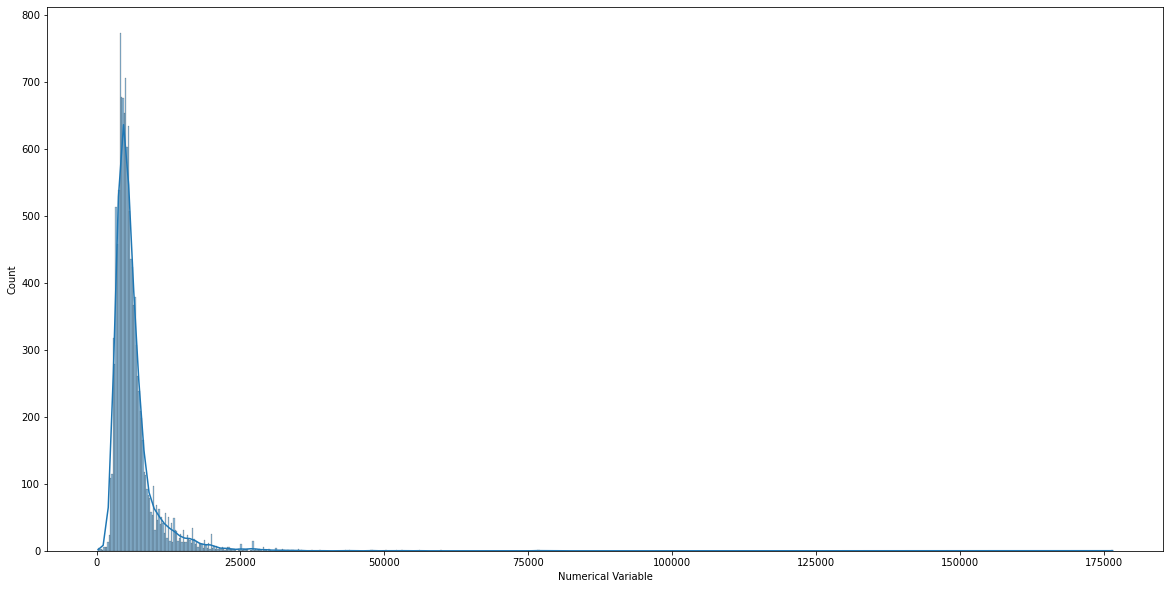

In [63]:
num_var=pd.Series(df6.price_per_sqft,name="Numerical Variable")
sns.histplot(data=num_var,kde=True)

In [64]:
# FUNCTION TO REMOVE OUTLIERS OF THE RANGE ABOVE (Q1-1.5*IQR< VALUE< Q3+1.5*IQR)

def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key , subdf in df.groupby('location'):
        q1 = np.quantile(subdf.price_per_sqft,0.25)
        q3 = np.quantile(subdf.price_per_sqft,0.75)
        iqr=q3-q1
        reudced_df = subdf[(subdf.price_per_sqft>(q1-1.5*iqr)) & (subdf.price_per_sqft<(q3+1.5*iqr))]
        df_out = pd.concat([df_out,reudced_df], ignore_index = True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(11634, 8)

In [65]:
df7.describe()

,bath,balcony,price,BHK,total_sqft1,price_per_sqft
count,11634.000000,11634.000000,11634.000000,11634.000000,11634.000000,11634.000000
mean,2.490459,1.603318,94.073160,2.592058,1534.572478,5730.390133
std,1.004393,0.789138,95.468886,0.923252,1110.543032,2495.020594
min,1.000000,0.000000,9.000000,1.000000,300.000000,267.829813
25%,2.000000,1.000000,48.000000,2.000000,1105.000000,4166.666667
50%,2.000000,2.000000,67.000000,2.000000,1290.000000,5169.203193
75%,3.000000,2.000000,103.000000,3.000000,1655.750000,6577.331016
max,16.000000,3.000000,2200.000000,16.000000,52272.000000,27083.333333


<AxesSubplot:xlabel='Numerical Variable', ylabel='Count'>

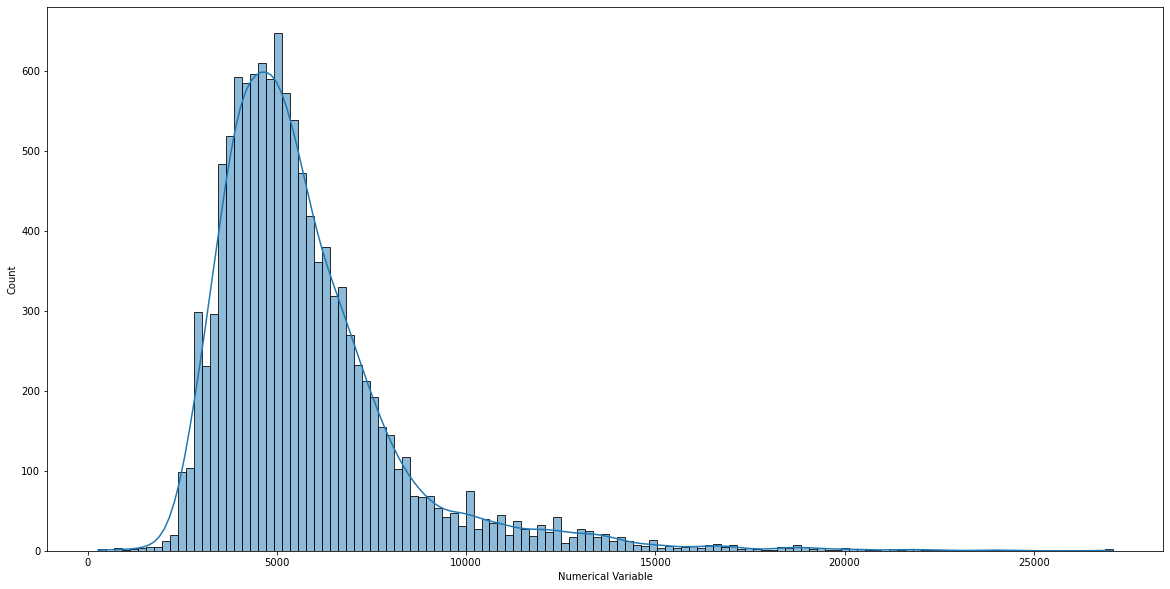

In [66]:
num_var1 = pd.Series(df7.price_per_sqft, name = "Numerical Variable")
sns.histplot(data = num_var1, kde = True)

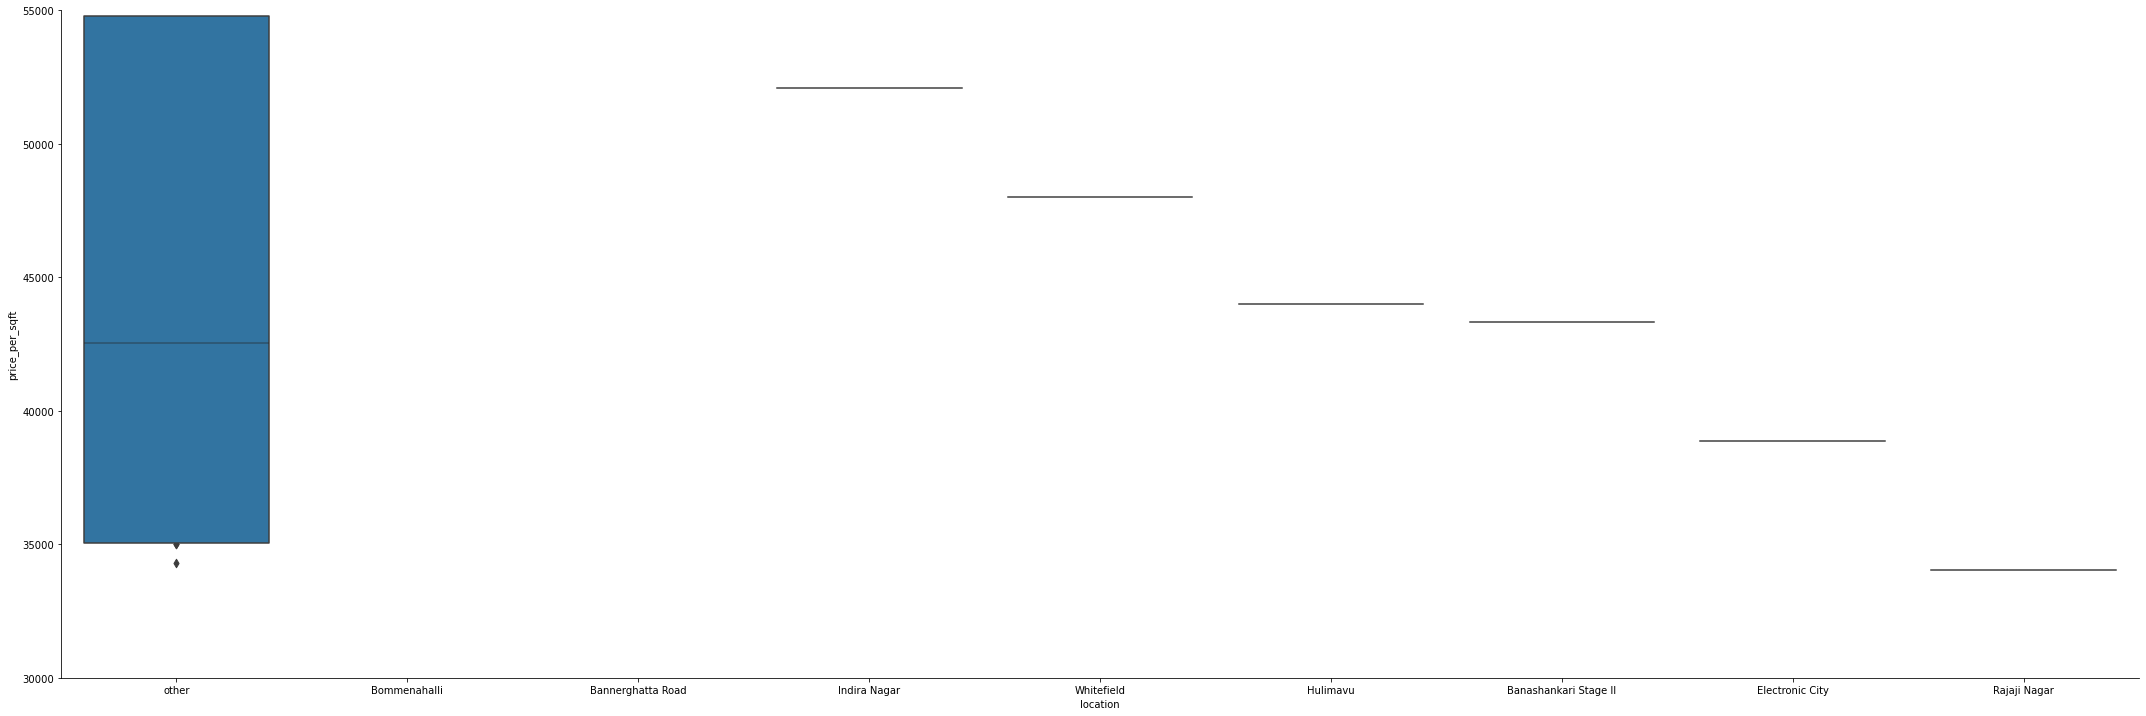

In [67]:
ax1=sns.catplot(y = "price_per_sqft", x = "location", data = df6.sort_values("price_per_sqft", ascending = False).head(20), kind="boxen", height = 10, aspect = 3,)
ax1.set(ylim=(30000, 55000))

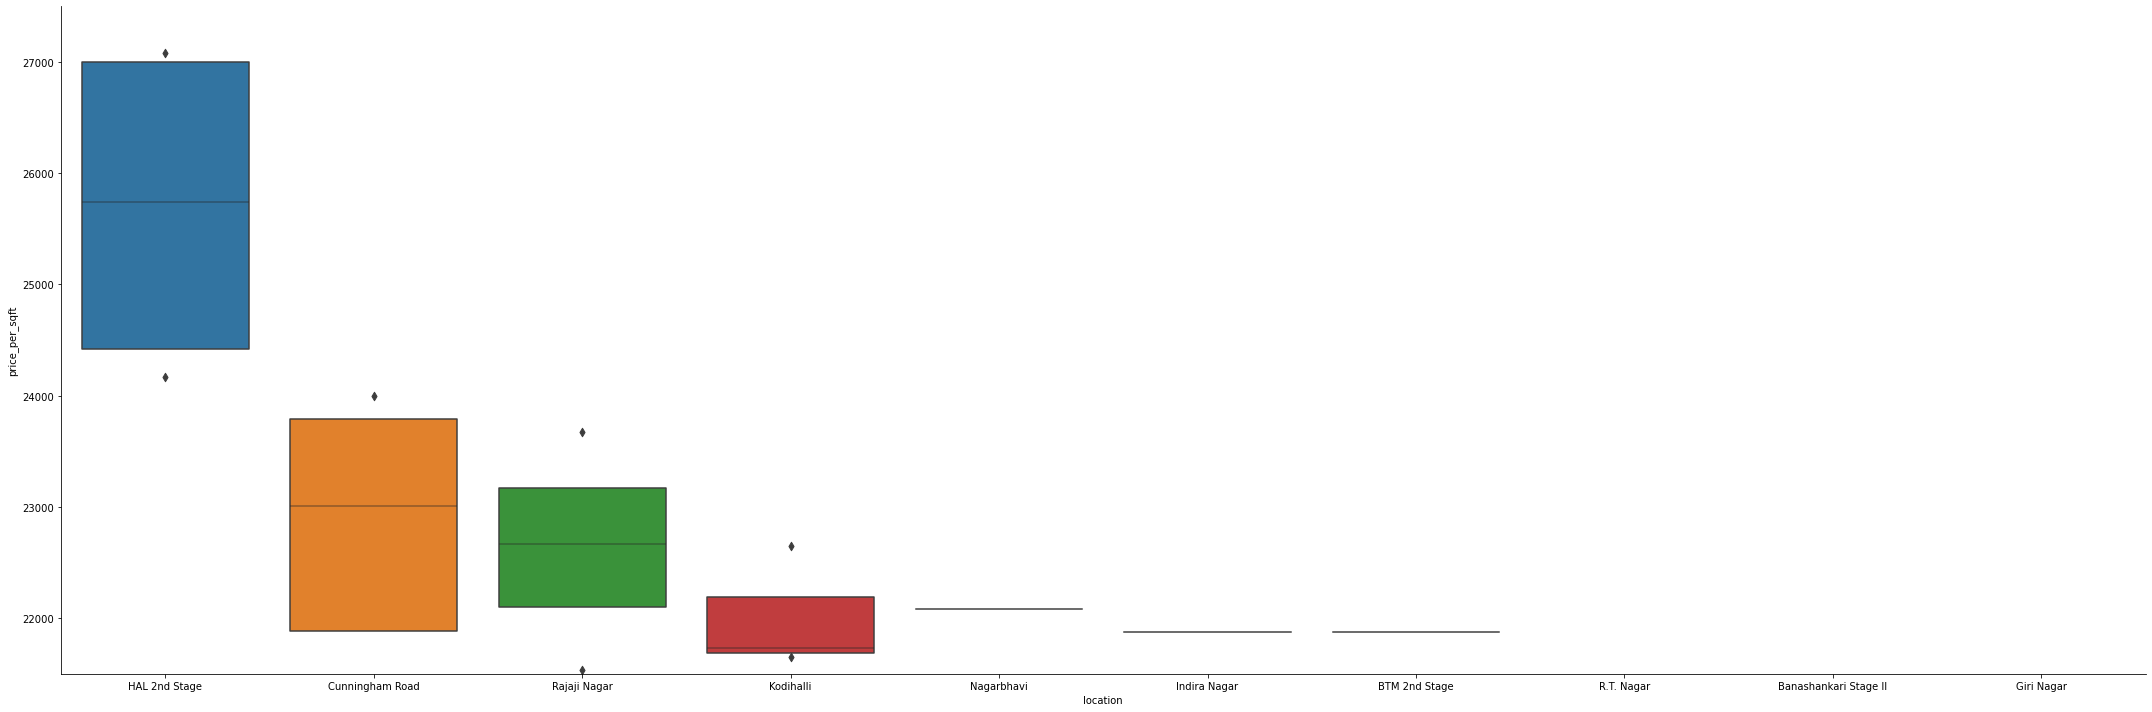

In [68]:
ax=sns.catplot(y = "price_per_sqft", x = "location", data = df7.sort_values("price_per_sqft", ascending = False).head(20), kind="boxen", height = 10, aspect = 3,)

ax.set(ylim=(21500, 27500))

In [69]:
df7.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [70]:
dftry=df7.drop(['area_type','location'],axis = 1) #why

<AxesSubplot:>

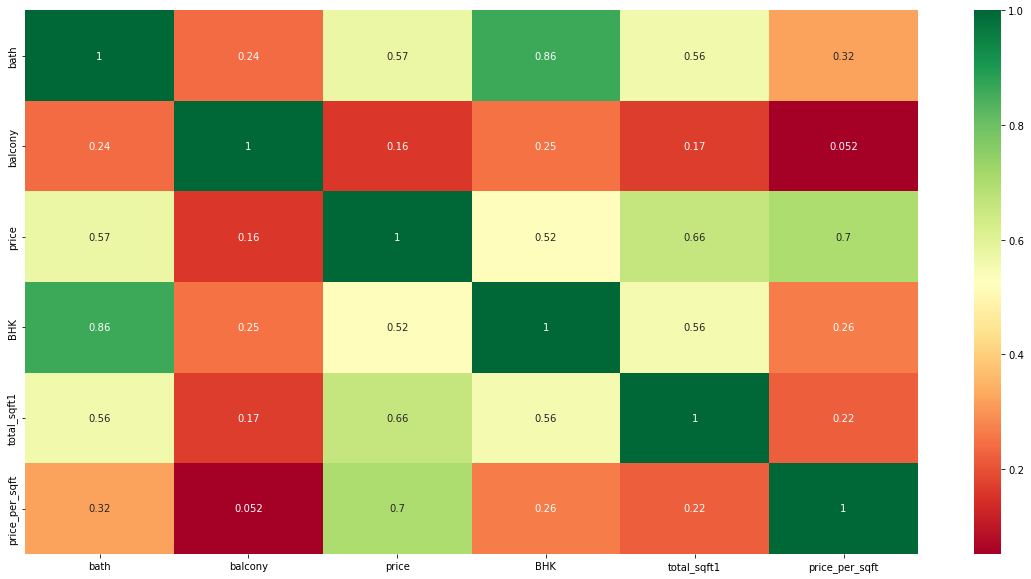

In [71]:
sns.heatmap(dftry.corr(),annot=True, cmap='RdYlGn')

In [72]:
location=df7.location.unique()
len(location)

241

**WE WILL REMOVE ALL 3BHK WITH SAME LOCATION AS 2BHK AND AT A LESSER PRICE***
we will do the same with any 2 bhk flat with less price thaan 1bhk if in same location and sqft

In [73]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for BHK, BHK_df in location_df.groupby('BHK'):
            bhk_stats[BHK] = {
                'mean': np.mean(BHK_df.price_per_sqft),
                'std': np.std(BHK_df.price_per_sqft),
                'count': BHK_df.shape[0]
            }
        for BHK, BHK_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(BHK-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, BHK_df[BHK_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)

df8.shape

(8323, 8)

Text(0, 0.5, 'Count')

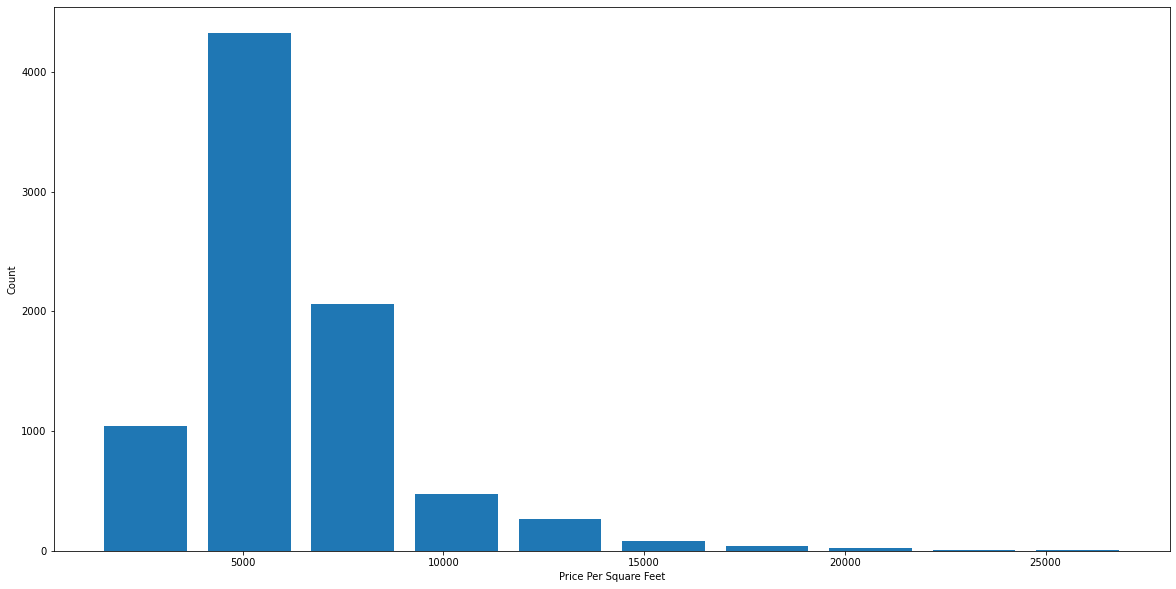

In [74]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

**NOW ALL OUR COLUMNS ARE NUMERICAL**


In [75]:
df10 = pd.get_dummies(df8,drop_first= True)

In [76]:
df10.head() #final dataset for regression analysis

,bath,balcony,price,BHK,total_sqft1,price_per_sqft,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_1st Phase JP Nagar,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other
0,4.0,1.0,428.0,4,2850.0,15017.543860,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,2.0,194.0,3,1630.0,11901.840491,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,3.0,235.0,3,1875.0,12533.333333,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4.0,2.0,450.0,4,2400.0,18750.000000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.0,2.0,60.0,2,1000.0,6000.000000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
df10.shape

(8323, 249)

**TEST TRAIN AND SPLIT**

In [155]:
X=df10.drop(['price'],axis='columns')
X.head()

,bath,balcony,BHK,total_sqft1,price_per_sqft,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other
0,4.0,1.0,4,2850.0,15017.543860,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,2.0,3,1630.0,11901.840491,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,3.0,3,1875.0,12533.333333,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.0,2.0,4,2400.0,18750.000000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.0,2.0,2,1000.0,6000.000000,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [156]:
y=df10.price

In [157]:
print(y)

0        428.0
1        194.0
2        235.0
3        450.0
4         60.0
         ...  
11625     70.0
11626    200.0
11629    110.0
11630     26.0
11633    400.0
Name: price, Length: 8323, dtype: float64


In [158]:
X.shape

(8323, 248)

In [159]:
y.shape

(8323,)

In [160]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

**LINEAR REGRESSION**

In [161]:
import sklearn
import math
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_scoure=lr_clf.score(X_test,y_test)
lin_preds = lr_clf.predict(X_test)
lin_mse = sklearn.metrics.mean_squared_error(y_test, lin_preds) 
lin_rmse = math.sqrt(lin_mse)
print(lin_rmse) ## value of RMSE
print(lr_scoure)

25.669239730855413
0.9079154801915525


In [162]:
lr_clf.score(X_train,y_train)

0.9038953328398122

In [163]:
X.columns

Index(['bath', 'balcony', 'BHK', 'total_sqft1', 'price_per_sqft',
       'area_type_Carpet  Area', 'area_type_Plot  Area',
       'area_type_Super built-up  Area', 'location_1st Phase JP Nagar',
       'location_2nd Phase Judicial Layout',
       ...
       'location_Vishveshwarya Layout', 'location_Vishwapriya Layout',
       'location_Vittasandra', 'location_Whitefield',
       'location_Yelachenahalli', 'location_Yelahanka',
       'location_Yelahanka New Town', 'location_Yelenahalli',
       'location_Yeshwanthpur', 'location_other'],
      dtype='object', length=248)

In [173]:
def predict_price(location,bath,balcony,BHK,total_sqft1,price_per_sqft):
    loc_index=np.where(X.columns==location)[0][0]
    z=np.zeros(len(X.columns))
    z[0]=bath
    z[1]=balcony
    z[2]=BHK
    z[3]=total_sqft1
    z[4]=price_per_sqft
    if loc_index>=0:
        z[loc_index]=1
    return lr_clf.predict([z])[0]



In [174]:
predict_price("location_1st Phase JP Nagar",2,2,2,750,15000)

C:\Users\Shiv Yadav\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


201.08231742248262

In [166]:
lin_preds=lr_clf.predict(X_test)
lin_preds

array([43.06433367, 40.8313261 , 91.67038804, ..., 48.03835426,
       84.58981746, 56.3748594 ])

In [167]:
y_test

6546      47.39
5978      53.50
8835      88.00
3218      77.68
6583      45.00
          ...  
8586     316.00
5350     300.00
4254      52.00
10956     90.00
3213      61.45
Name: price, Length: 1665, dtype: float64

In [168]:
list1=lr_clf.coef_.tolist()
print(len(list1))
print(list1)

248
[2.483840990753133, -1.2016973764916294, -10.885659379141515, 0.08439109342228868, 0.020100306196734863, 2.6073041889382367, -8.352070911486152, 4.913794828568733, -15.891242855463304, 12.736353887816632, -10.268021054516401, -31.511198419562962, -1.4629864260472045, -25.54919964538663, -4.032192027931188, 2.478585500206244, 1.0802893727875276, 2.296542985522823, 15.060617382138563, -0.12510653482907053, -5.038608539510027, -17.450949906344853, 0.7421561909135177, 10.727150798294808, 33.24690440967516, 27.92667820922559, 15.342520815686958, -8.674611217163093, -2.5150924313399567, 41.174422330049104, 2.537811427886983, 2.5784453398193654, 0.17858247071200672, 11.089796089792333, -10.948333648948296, -9.101031405932815, -2.3881758442113665, 1.7862544737086417, -5.570271005453153, 10.1095544974604, -31.25499202171553, 0.7951507907941617, -24.261213159020798, -7.037783472000662, -2.240986554249144, -19.936275752499608, -4.103096187156692, -2.746204478826275, 0.304584163594721, 11.4261

In [169]:
from sklearn.linear_model import Lasso
lr2_clf = Lasso()
lr2_clf.fit(X_train,y_train)
lasso_scoure=lr2_clf.score(X_test,y_test)
lasso_preds = lr2_clf.predict(X_test)
lasso_mse = sklearn.metrics.mean_squared_error(y_test, lasso_preds) 
lasso_rmse = math.sqrt(lasso_mse)
print(lasso_rmse)
print(lasso_scoure)

25.298520789312533
0.9105560700060288


In [170]:
list2=lr2_clf.coef_.tolist()
print(len(list2))
print(list2)

248
[-0.0, -0.0, -8.879082751863878, 0.08421069394701523, 0.019659057748855607, -0.0, -0.0, 2.8529440008260405, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, -0.0, 0.0, -0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, -0.0, 0.0, 0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, 0.0, -0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, -0.0, -0.0, 0.0, -0.0, 0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 